Problem Statement:

-Make a python script which fetches the App reviews(500 latest ones) for any app that you like and do a basic sentiment analysis on those reviews

**Remark:**
- for fetching the reviews I am going to use google play scraper
- for sentiment analysis I will use nltk's SentimentIntensityAnalyzer

In [74]:
#importing libraries

#for data wrangling
import pandas as pd 
import numpy as np

#for data preprocessing and sentiment analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

#for scraping the reviews
from google_play_scraper import app, Sort , reviews

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#scraping the reviews
spotify,_ = reviews('com.spotify.music' , sort = Sort.NEWEST, count =500)

In [60]:
#creating a dataframe

df = pd.json_normalize(spotify)
print("Number of Reviews:",df.shape[0])

Number of Reviews: 500


**Quick EDA**

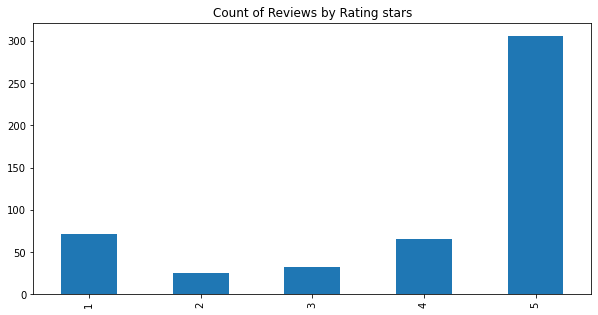

In [65]:
df['score'].value_counts().sort_index().plot(kind='bar' , title='Count of Reviews by Rating stars' , figsize=(10,5))
plt.show()

Remark:
- Most of the reviews has an score of 5 stars , so we can assume that higher stars relate to positive reviews

In [94]:
#average score

df['score'].mean()

4.02

**Basic NLTK**

In [95]:
example = df['content'][50]              #taking an example
print(example)

Ive had spotify for years... I absolutely love it except for when it decides to take music down for no reason


In [98]:
token = nltk.word_tokenize(example)          #tokenizing the example
token[:5]

['Ive', 'had', 'spotify', 'for', 'years']

In [102]:
tagged = nltk.pos_tag(token)         #checking the part of speech
tagged[:5]

[('Ive', 'NNP'),
 ('had', 'VBD'),
 ('spotify', 'VBN'),
 ('for', 'IN'),
 ('years', 'NNS')]

**VADER Sentiment Scoring**

This uses a "bag of words" approach:
   1. stop words are removed
   2. each word is scored and combined to a total score

In [77]:
sia = SentimentIntensityAnalyzer()

In [79]:
result = []
for row in tqdm(df['content']):
    result.append(sia.polarity_scores(row))

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 1835.02it/s]


In [82]:
#lets check out the result
print("Review:",df['content'][0])
print("Score:",result[0])

Review: Great company for entertainment.
Score: {'neg': 0.0, 'neu': 0.225, 'pos': 0.775, 'compound': 0.7845}


In [84]:
pd.DataFrame(result)

,neg,neu,pos,compound
0,0.000,0.225,0.775,0.7845
1,0.000,0.667,0.333,0.6114
2,0.000,0.862,0.138,0.3400
3,0.021,0.846,0.133,0.7622
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
495,0.000,1.000,0.000,0.0000
496,0.000,0.208,0.792,0.5859
497,0.000,0.256,0.744,0.4404
498,0.000,1.000,0.000,0.0000


In [89]:
vaders = pd.DataFrame(result)
df = df.join(vaders)

In [90]:
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,neg,neu,pos,compound
0,b3d9bc3b-070f-4b13-ac70-47a37ca1828c,ju juju,https://play-lh.googleusercontent.com/a/AItbvm...,Great company for entertainment.,5,0,8.7.62.398,2022-09-05 22:08:48,None,NaT,0.000,0.225,0.775,0.7845
1,60a2de87-d4ec-4286-96ab-49ffe3f077b0,Michael Peet,https://play-lh.googleusercontent.com/a/AItbvm...,Excellent and has any music you can think of! ...,5,0,8.7.62.398,2022-09-05 22:07:13,None,NaT,0.000,0.667,0.333,0.6114
2,4230fce3-57e8-41bd-9f63-b4f1201d125a,Yessir_Anthony,https://play-lh.googleusercontent.com/a-/AFdZu...,It has so many choices for songs to play you c...,5,0,8.7.62.398,2022-09-05 22:06:54,None,NaT,0.000,0.862,0.138,0.3400
3,a368f938-6cef-42a8-ac66-31800e3b2f14,Neha Rajoria,https://play-lh.googleusercontent.com/a-/AFdZu...,Well even after you pay for premium it takes s...,1,0,8.7.62.398,2022-09-05 22:06:51,None,NaT,0.021,0.846,0.133,0.7622
4,3c98b777-e2c0-4259-813d-16024cad663f,Piyush Singh,https://play-lh.googleusercontent.com/a-/AFdZu...,Hearty 5 star rating.,5,0,8.7.62.398,2022-09-05 22:06:23,None,NaT,0.000,1.000,0.000,0.0000


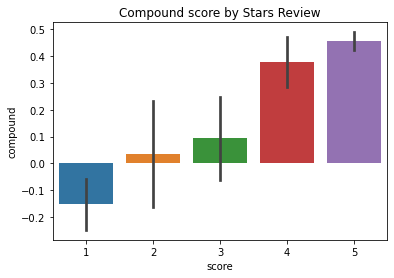

In [91]:
#plotting vaders results

ax = sns.barplot(data=df , x='score' , y = 'compound')
ax.set_title('Compound score by Stars Review')
plt.show()

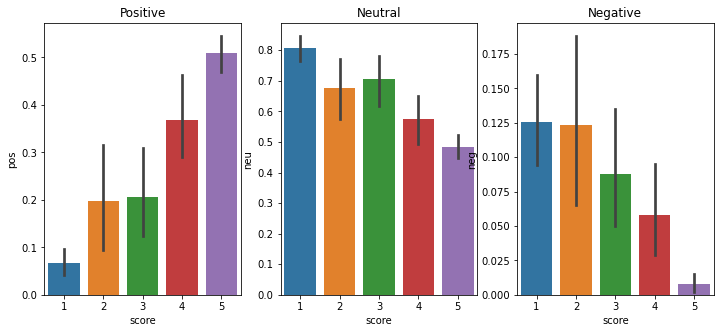

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(12,5))
sns.barplot(data=df , x='score' , y = 'pos' , ax = axs[0])
sns.barplot(data=df , x='score' , y = 'neu' , ax = axs[1])
sns.barplot(data=df , x='score' , y = 'neg' , ax = axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.show()

**Review Examples**

- Positive 1-star and negative 5-star reviews

In [104]:
df.query('score==1').sort_values('pos' , ascending = False)['content'].values[0]

'The Best music app'

In [105]:
df.query('score==5').sort_values('neg' , ascending = False)['content'].values[0]

'Very bad'